# Introduction to Dimensionality reduction

The goal of dimensionality reduction is to find a compact representaion of the data, from which, data can be reconstructed. By a compact representation, we mean a transformation from the input space $\mathbb{R}^d$ to $\mathbb{R}^p$, where $p << d$  

## Principal component analysis (PCA)

PCA is a linear dimensionality reduction and can be derived from different yet equivalent perspectives.
* Statisitical: Transformation that captures most of the spread fo the data in terms of variance
* Geometric: Projection to a subspace that minimizes the Euclidean distances between the original points and their projected counterparts.

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets

# load the iris data set
iris = datasets.load_iris()
# extract input output pairs
X = iris.data
Y = iris.target
cmap_data = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

def euclideanDistance(x1, x2):
    d2 = np.sum((x1 - x2)**2, axis=1)
    return np.sqrt(d2)


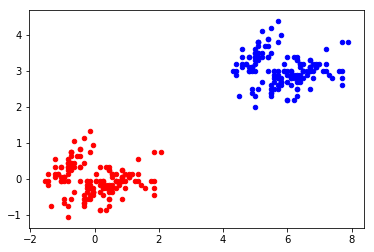

In [2]:
## center the data 
X_mean = np.mean(X, axis=0, keepdims=True)
X_cent = X - X_mean
X_cent.shape
plt.scatter(X[:,0], X[:,1], s=20, c='b')
plt.scatter(X_cent[:,0], X_cent[:,1], s=20, c='r')
plt.show()

## Compute principal components (statistical view)


In [3]:
X_cov = np.cov(X_cent.transpose())

from numpy.linalg import eigh
eigval, eigvec = eigh(X_cov)


## Exercise 1
Compute the first 2 principal components.

Hint: use the function numpy.dot() to multiply matrices.

[0.02368303 0.07852391 0.24224357 4.22484077]
[[ 0.31725455  0.58099728  0.65653988 -0.36158968]
 [-0.32409435 -0.59641809  0.72971237  0.08226889]
 [-0.47971899 -0.07252408 -0.1757674  -0.85657211]
 [ 0.75112056 -0.54906091 -0.07470647 -0.35884393]]


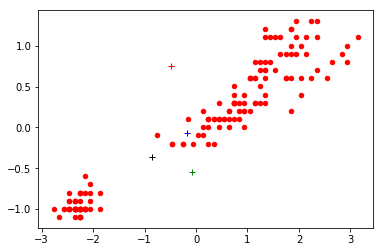

(150, 4)
0.023525140278495272


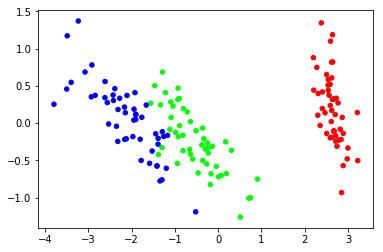

In [4]:
## Write some lines of code here
print(eigval)
print(eigvec)
plt.scatter(X_cent[:,2], X_cent[:,3], s=20, c='r')
plt.plot(eigvec[2,0],eigvec[3,0], 'r+')
plt.plot(eigvec[2,1],eigvec[3,1], 'g+')
plt.plot(eigvec[2,2],eigvec[3,2], 'b+')
plt.plot(eigvec[2,3],eigvec[3,3], 'k+')
plt.show()
Z = np.dot(X_cent, eigvec)
print(Z.shape)
print(np.var(Z[:,0]))

plt.scatter(Z[:, 3], Z[:,2], s=20, c=Y, cmap=cmap_data)
plt.show()

## Exercise 2
Compute the principal components after z-scoring the original dimensions. In other words, normalize eachof the columns of X_cent
to have unit variance and compute the eigendecomposition of the new covariance matrix. 

Hint: verify the new covariance has ones in the main diagonal.


In [5]:
## Write some lines of code here
X_std = np.std(X_cent, axis=0, keepdims=True)
X_zscore = X_cent / X_std

print(np.var(X_zscore, axis=0))
print(np.var(X_cent, axis=0))

[1. 1. 1. 1.]
[0.68112222 0.18675067 3.09242489 0.57853156]


(150, 2)


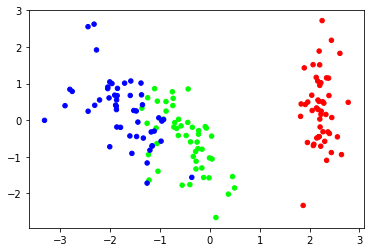

In [6]:
X_cov = np.cov(X_zscore.transpose())
eigval, eigvec = eigh(X_cov)
Z = np.dot(X_zscore, eigvec[:,-1:-3:-1])
print(Z.shape)
plt.scatter(Z[:,0], Z[:,1], c=Y, cmap=cmap_data, s=20)
plt.show()